In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

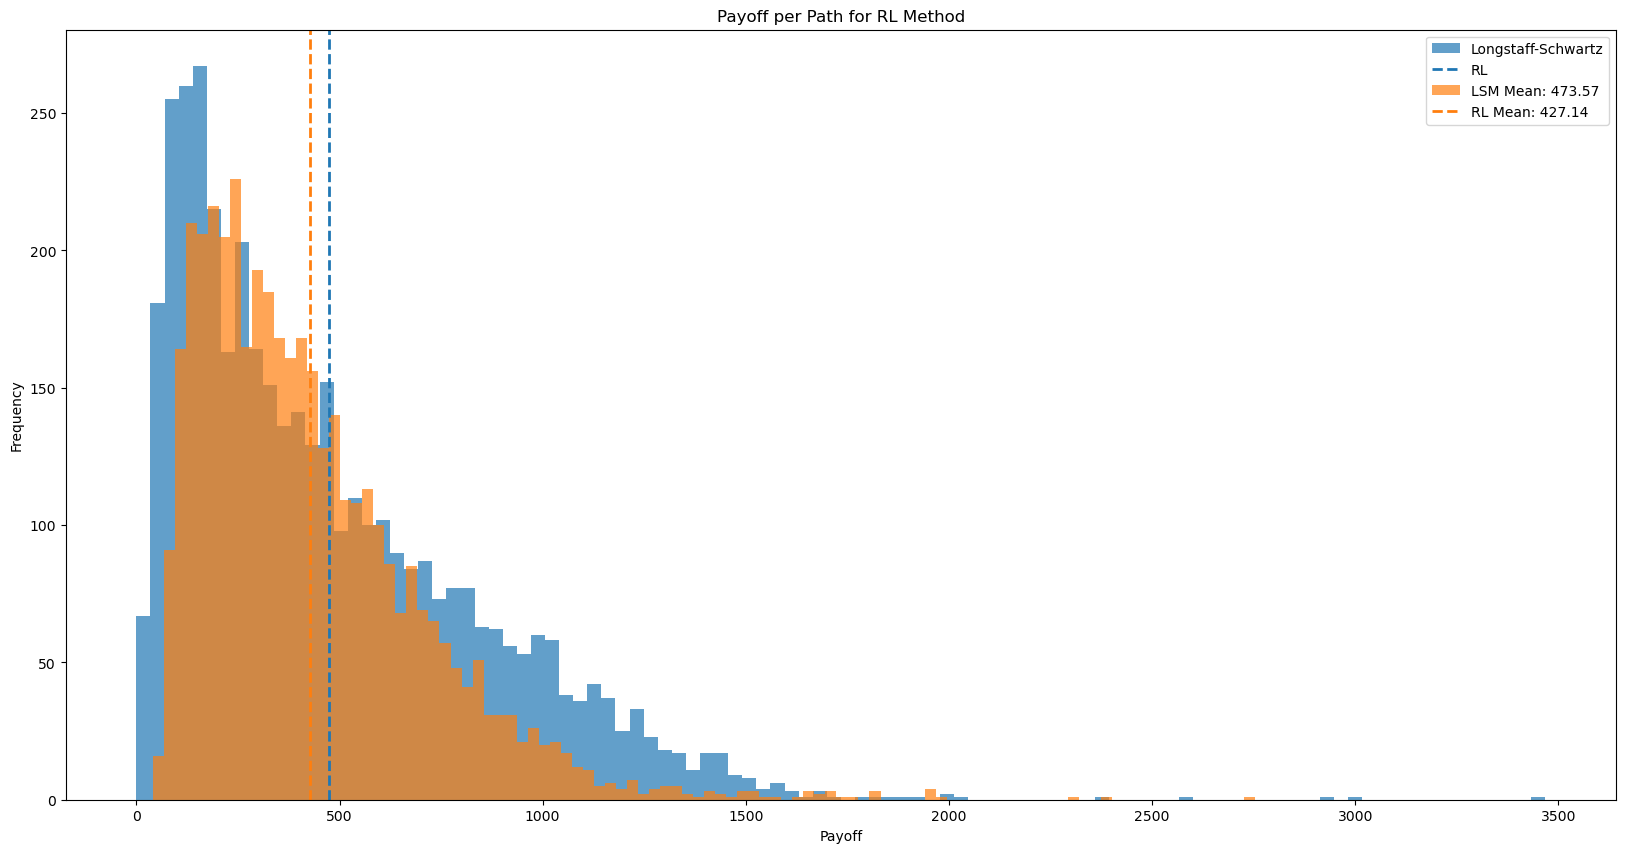

In [31]:
# for the LSM 
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing_d1/evaluation_runs/longstaff_schwartz_solution.csv')

lsm['payoff'] = np.abs(lsm['spot_price'] - 100) * lsm['q_decision']

ax = lsm.groupby('path_idx')['payoff'].sum().plot(kind='hist', bins=100,
                                             figsize=(20, 10), title='Payoff per Path for Longstaff-Schwartz Method',
                                             color='tab:blue', alpha=0.7)

# Add vertical line for LSM mean
lsm_mean = lsm.groupby('path_idx')['payoff'].sum().mean()
ax.axvline(lsm_mean, color='tab:blue', linestyle='--', linewidth=2, label=f'LSM Mean: {lsm_mean:.2f}')

# for the RL
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing_d1/evaluation_runs/eval_run_4096.csv')

rl['payoff'] = np.abs(rl['spot'] - 100) * rl['q_actual']

rl.groupby('episode_idx')['payoff'].sum().plot(kind='hist', bins=100, ax=ax,
                                             figsize=(20, 10), title='Payoff per Path for RL Method',
                                             color='tab:orange', alpha=0.7)

# Add vertical line for RL mean
rl_mean = rl.groupby('episode_idx')['payoff'].sum().mean()
ax.axvline(rl_mean, color='tab:orange', linestyle='--', linewidth=2, label=f'RL Mean: {rl_mean:.2f}')

plt.legend(['Longstaff-Schwartz', 'RL', f'LSM Mean: {lsm_mean:.2f}', f'RL Mean: {rl_mean:.2f}'])
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.show()

In [29]:
lsm.groupby('path_idx').sum().describe()

,step,spot_price,q_remaining,q_exercised,time_left,q_decision,payoff
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,212.631348,2502.235255,311.281738,109.753418,0.948512,16.358887,473.567965
std,32.828103,285.547906,57.317356,36.697153,0.025527,4.142175,370.294699
min,55.000000,1501.247263,110.000000,0.000000,0.708050,0.000000,0.000000
25%,210.000000,2311.229419,272.000000,86.000000,0.954164,14.000000,171.797650
50%,231.000000,2503.092371,316.000000,114.000000,0.957950,18.000000,377.033645
75%,231.000000,2692.371353,354.000000,132.000000,0.957950,20.000000,694.227766
max,231.000000,3379.575049,440.000000,276.000000,0.957950,20.000000,3468.089062


In [30]:
rl.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward,payoff
count,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,215.860596,2550.474948,207.810958,216.681230,0.950725,9.919626,19.451140,398.238509,427.136150
std,30.118291,334.107842,17.761060,18.374938,0.017275,0.585917,0.807399,296.184677,277.999793
min,105.000000,1543.032400,146.043600,137.403600,0.852000,7.105744,14.211490,0.000000,40.549390
25%,210.000000,2327.947450,199.631825,212.333775,0.954200,9.537814,19.075627,181.590064,218.425929
50%,231.000000,2525.802900,212.204300,221.522100,0.958000,9.993940,19.987881,346.410761,367.047112
75%,231.000000,2750.973925,219.730825,228.145000,0.958000,10.348861,20.000000,557.922214,566.434488
max,231.000000,5056.921800,288.250600,250.984500,0.958000,10.996699,20.000003,2750.465842,2754.142386
